### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
training_set = dataset_train.reset_index()['Open']

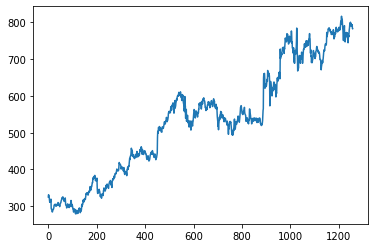

In [4]:
plt.plot(training_set)

In [5]:
training_set = np.array(training_set).reshape(-1,1)

In [6]:
training_set.shape

(1258, 1)

### Feature Scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set = sc.fit_transform(training_set)

In [8]:
train_size = int(len(training_set)*0.9)
test_size = len(training_set)-train_size

In [9]:
print(train_size,test_size)

1132 126


In [10]:
train = training_set[0:train_size,:]
test = training_set[train_size:len(training_set),:]

# 100 timesteps and 1 output

In [11]:
time_step=100
def create_timesteps(data):
    X_data = []
    y_data = []
    for i in range(time_step, len(data)):
        X_data.append(data[i-time_step:i, 0])
        y_data.append(data[i, 0])
    X_data, y_data = np.array(X_data), np.array(y_data)
    return X_data,y_data

In [12]:
X_train,y_train = create_timesteps(train)
X_test,y_test = create_timesteps(test) 

### Reshaping

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [14]:
print(X_train.shape), print(y_train.shape)

(1032, 100, 1)
(1032,)


(None, None)

In [15]:
print(X_test.shape), print(y_test.shape)

(26, 100, 1)
(26,)


(None, None)

### Importing the Keras libraries and packages

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


### Initialising the RNN

In [17]:
regressor = Sequential()

# Adding the LSTM layer

In [18]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))

In [19]:
regressor.add(LSTM(units = 50, return_sequences = True))

In [20]:
regressor.add(LSTM(units = 50))
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
Total params: 50,800
Trainable params: 50,800
Non-trainable params: 0
_________________________________________________________________


### Adding the output layer

In [21]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [22]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [23]:
regressor.fit(X_train, y_train,validation_data=(X_test,y_test), epochs = 100, batch_size = 32)

Train on 1032 samples, validate on 26 samples
Epoch 1/100
1032/1032 [==============================] - 8s 8ms/step - loss: 0.0412 - val_loss: 0.0200
Epoch 2/100
1032/1032 [==============================] - 7s 7ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 3/100
1032/1032 [==============================] - 7s 7ms/step - loss: 0.0019 - val_loss: 0.0047
Epoch 4/100
1032/1032 [==============================] - 7s 7ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 5/100
1032/1032 [==============================] - 7s 7ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 6/100
1032/1032 [==============================] - 7s 7ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 7/100
1032/1032 [==============================] - 7s 7ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 8/100
1032/1032 [==============================] - 7s 7ms/step - loss: 0.0015 - val_loss: 7.9124e-04
Epoch 9/100
1032/1032 [==============================] - 7s 7ms/step - loss: 0.0015 - val_loss: 8.5183e-04
Epoch 10/100
1032/1

Epoch 76/100
1032/1032 [==============================] - 7s 7ms/step - loss: 3.7163e-04 - val_loss: 8.0644e-04
Epoch 77/100
1032/1032 [==============================] - 7s 7ms/step - loss: 3.6489e-04 - val_loss: 7.1263e-04
Epoch 78/100
1032/1032 [==============================] - 7s 7ms/step - loss: 4.6049e-04 - val_loss: 7.4485e-04
Epoch 79/100
1032/1032 [==============================] - 7s 7ms/step - loss: 3.7310e-04 - val_loss: 9.7596e-04
Epoch 80/100
1032/1032 [==============================] - 7s 7ms/step - loss: 3.4302e-04 - val_loss: 6.3039e-04
Epoch 81/100
1032/1032 [==============================] - 7s 7ms/step - loss: 3.1070e-04 - val_loss: 2.6662e-04
Epoch 82/100
1032/1032 [==============================] - 7s 7ms/step - loss: 3.1344e-04 - val_loss: 4.0124e-04
Epoch 83/100
1032/1032 [==============================] - 7s 7ms/step - loss: 3.1886e-04 - val_loss: 3.7785e-04
Epoch 84/100
1032/1032 [==============================] - 7s 7ms/step - loss: 3.2601e-04 - val_loss: 2.9

# Getting the real stock price

In [24]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
test_set = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price 

In [25]:
test_set.shape

(20, 1)

In [27]:
ds = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = ds[len(ds) - len(dataset_test) - time_step:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test,_ = create_timesteps(inputs)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred = regressor.predict(X_test)
pred = sc.inverse_transform(pred)
y_test = test_set

In [28]:
X_test.shape

(20, 100, 1)

### Visualising the results

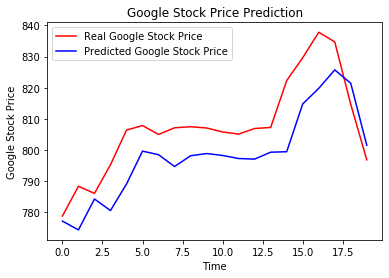

In [30]:
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# RMSE 

In [32]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test,pred))

11.464164783982898